In [1]:
cd ../analysis/

/home/jlee782/hcomp_paper_seg/analysis


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from utils import *
import pickle as pkl

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [44]:
sample ="15workers_rand0"
objid=1
clust_id="-1"
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"

In [49]:
m = pkl.load(open("pixel_em/obj1/mask201.pkl"))

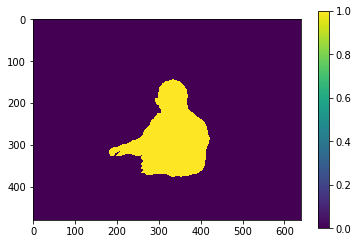

In [52]:
plt.imshow(m)
plt.colorbar()

In [46]:
print "prj now:",json.load(open(here+"basic_EM_prj_best_thresh.json"))
print "prj before:",json.load(open(there+"EM_prj_best_thresh.json"))

prj now: [0.018808499469758502, 0.20252826153376108, 0.017511590737976673]
prj before: [0.9867046899687849, 0.9778490681332112, 0.9651324965132496]


In [28]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/worker_ids.json

[196, 156, 219, 201, 246]

In [21]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust0/worker_ids.json

[196, 219, 156, 246, 201]

In [22]:
cat /home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust1/worker_ids.json

[]

In [47]:
sample ="5workers_rand0"
objid=1
clust_id="-1"
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"

In [23]:
m = pkl.load(open("/home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/clust0/GTLSA_gt_est_tiles_best_thresh.pkl"))

In [48]:
import json
print "prj now:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "prj before:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

prj now: [-1, 0.0, 0.0]
prj before: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]


In [60]:
m = pkl.load(open("/home/jlee782/hcomp_paper_seg/analysis/pixel_em/5workers_rand0/obj1/GTLSA_gt_est_tiles_best_thresh.pkl"))

In [61]:
m

set()

In [53]:
sample ="10workers_rand0"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9913617886178862, 0.968644974029942, 0.9605377769361864]
there: [0.9941394803672592, 0.9717766575007638, 0.9662413609782031]


In [52]:
sample ="15workers_rand0"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9866733428340331, 0.9783455545371219, 0.9655861289106672]
there: [0.9868998998227634, 0.9782309807516041, 0.9656914492535063]


In [95]:
from withClustAnalysis import *
# Pick best clusters for each object sample based on MV
best_clust_df = pd.read_csv("best_clust_picking.csv")
clustObj=clust_df.objid.unique()

In [101]:
df = pd.read_csv("pixel_em/MV_full_PRJ_table.csv")
df = filter_best_clust(df,best_clust_df)
df = df.rename(columns={"precision":"P [MV]",
                       "recall":"R [MV]",
                       "jaccard":"J [MV]",
                       "FPR%":"FPR% [MV]",
                       "FNR%":"FNR% [MV]"})
df = df.drop(["thresh"],axis=1)
df= df[((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))|((df["clust"]!=-1) & df["objid"].isin(clustObj))]
for mode in ["basic","GT","isoGT","GTLSA","isoGTLSA"]:
    data =  pd.read_csv("pixel_em/{}_full_PRJ_table.csv".format(mode))
    data = data.rename(columns={"precision":"P [{}]".format(mode),
                           "recall":"R [{}]".format(mode),
                           "jaccard":"J [{}]".format(mode),
                           "FPR%":"FPR% [{}]".format(mode),
                           "FNR%":"FNR% [{}]".format(mode)})
    data = data.drop(["thresh"],axis=1)
    data = filter_best_clust(data,best_clust_df)
    #assert len(df)==31*len(object_lst)
    df = df.merge(data,on=['clust', 'num_workers', 'objid','sample_num'],how="outer")
#assert pd.isnull(df).sum().sum()==0

In [107]:
df[df['P [GTLSA]']==-1]

,num_workers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],P [basic],...,P [GTLSA],R [GTLSA],J [GTLSA],FPR% [GTLSA],FNR% [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA]
184,10,4,1,0,0.985640,0.985602,0.971649,0.133800,1.439811,NaN,...,-1,0,0,NaN,NaN,0.985904,0.985640,0.971943,NaN,NaN
646,20,0,3,-1,0.961096,0.921218,0.888101,0.046804,7.878151,NaN,...,-1,0,0,NaN,NaN,0.962161,0.921481,0.889255,NaN,NaN
691,20,1,2,-1,0.968280,0.976423,0.946158,0.070872,2.357711,NaN,...,-1,0,0,NaN,NaN,0.966493,0.974621,0.942766,NaN,NaN
733,20,1,9,-1,0.974196,0.944936,0.921862,0.078740,5.506444,NaN,...,-1,0,0,NaN,NaN,0.972771,0.943657,0.919373,NaN,NaN
793,20,3,15,0,0.810985,0.988189,0.803200,0.038149,1.181102,NaN,...,-1,0,0,NaN,NaN,0.810985,0.988189,0.803200,NaN,NaN
966,5,0,1,0,0.977603,0.980179,0.958651,0.209241,1.982126,NaN,...,-1,0,0,NaN,NaN,0.975025,0.978078,0.954173,NaN,NaN
1196,5,5,1,0,0.977603,0.980179,0.958651,0.209241,1.982126,NaN,...,-1,0,0,NaN,NaN,0.975025,0.978078,0.954173,NaN,NaN


In [4]:
from PixelEM_tile import do_EM_for as EM

In [6]:
EM("10workers_rand4", 4, 0, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("20workers_rand0", 3, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.0149521827698
Time for mask log prob calculation: 0.0244228839874
jaccard_against_prev_gt_est: 0.981458966565
iteration: 1
Time for worker prob calculation: 0.014888048172
Time for mask log prob calculation: 0.0250968933105
jaccard_against_prev_gt_est: 0.995712098009
iteration: 2
Time for worker prob calculation: 0.0152170658112
Time for mask log prob calculation: 0.0257868766785
jaccard_against_prev_gt_est: 0.999693251534
Final prj: [0.9601226993865031, 0.9484848484848485, 0.9125364431486881]
Time:26.2919800282
Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.0428748130798
Time for mask log prob calculation: 0.0624251365662
jaccard_against_prev_gt_est: 0.99318243796
iteration: 1
Time for worker prob calculation: 0.0430037975311
Time for mask log prob calculation: 0.0686490535736
jaccard_against_prev_gt_est: 0.996720415414
iteration: 2
Time for worker prob calculation: 0.0429739952087
Time for mask

25.865992069244385

In [7]:
EM("20workers_rand1", 2, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("20workers_rand1", 9, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.113559961319
Time for mask log prob calculation: 0.161251068115
jaccard_against_prev_gt_est: 0.989333333333
iteration: 1
Time for worker prob calculation: 0.111296892166
Time for mask log prob calculation: 0.155892133713
jaccard_against_prev_gt_est: 0.998213222156
iteration: 2
Time for worker prob calculation: 0.10493016243
Time for mask log prob calculation: 0.144984006882
jaccard_against_prev_gt_est: 0.998362364151
iteration: 3
Time for worker prob calculation: 0.102365970612
Time for mask log prob calculation: 0.146589040756
jaccard_against_prev_gt_est: 0.999851101846
Final prj: [0.9664929262844378, 0.9746208139360264, 0.942765833817548]
Time:34.1843528748
Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.123903989792
Time for mask log prob calculation: 0.179388999939
jaccard_against_prev_gt_est: 0.996492766331
iteration: 1
Time for worker prob calculation: 0.118783950806
Time for mask log prob c

20.147767066955566

In [8]:
EM("20workers_rand3", 15, 0, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("5workers_rand0", 1, 0, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("5workers_rand5", 1, 0, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.0120730400085
Time for mask log prob calculation: 0.0231239795685
jaccard_against_prev_gt_est: 0.996774193548
iteration: 1
Time for worker prob calculation: 0.0119779109955
Time for mask log prob calculation: 0.0228171348572
jaccard_against_prev_gt_est: 1.0
Final prj: [0.8109854604200323, 0.9881889763779528, 0.8032]
Time:19.4746649265
Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.0111889839172
Time for mask log prob calculation: 0.0177149772644
jaccard_against_prev_gt_est: 0.985886637833
iteration: 1
Time for worker prob calculation: 0.0111877918243
Time for mask log prob calculation: 0.0178220272064
jaccard_against_prev_gt_est: 0.989810660786
iteration: 2
Time for worker prob calculation: 0.0111470222473
Time for mask log prob calculation: 0.0176031589508
jaccard_against_prev_gt_est: 0.999200487322
Final prj: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]
Time:23.4729580879
Doing 

23.442106008529663

In [9]:
EM("15workers_rand0", 1, "-1", algo='basic',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

Doing basic mode = 
iteration: 0
Time for worker prob calculation: 0.343429088593
Time for mask log prob calculation: 0.415313005447
jaccard_against_prev_gt_est: 0.999268189346
iteration: 1
Time for worker prob calculation: 0.331922054291
Time for mask log prob calculation: 0.414433956146
jaccard_against_prev_gt_est: 0.999499268161
Final prj: [0.9867113473538248, 0.9783455545371219, 0.9656225262919823]
Time:20.3627750874


20.362775087356567

In [10]:
cat pixel_em/15workers_rand0/obj1/basic_EM_prj_best_thresh.json

[0.9867113473538248, 0.9783455545371219, 0.9656225262919823]

In [14]:
cat ../../final_segmentation/analysis/pixel_em/15workers_rand0/obj1/EM_prj_best_thresh.json

[0.9867046899687849, 0.9778490681332112, 0.9651324965132496]

In [17]:
EM("5workers_rand0", 1, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

Doing GTLSA mode = 
iteration: 0
Time for worker prob calculation: 0.0117518901825
Time for mask log prob calculation: 0.0185821056366
jaccard_against_prev_gt_est: 0.985886637833
iteration: 1
Time for worker prob calculation: 0.0113770961761
Time for mask log prob calculation: 0.0188760757446
jaccard_against_prev_gt_est: 0.989810660786
iteration: 2
Time for worker prob calculation: 0.0144391059875
Time for mask log prob calculation: 0.0209078788757
jaccard_against_prev_gt_est: 0.999200487322
Final prj: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]
Time:25.4289867878


25.42898678779602

In [18]:
sample ="5workers_rand0"
objid=1
clust_id=0
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]
there: [0.9773003340419071, 0.9832722273143905, 0.9613173026659697]


In [19]:
sample ="5workers_rand0"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]
there: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]


In [20]:
sample ="20workers_rand3"
objid=1
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9884697233507448, 0.9756721662083715, 0.964692999018201]
there: [0.9885079709023371, 0.9756721662083715, 0.9647294286469544]


In [21]:
sample ="5workers_rand5"
objid=1
clust_id=0
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9750247468209853, 0.9780782157042469, 0.9541728763040238]
there: [0.9773003340419071, 0.9832722273143905, 0.9613173026659697]


In [ ]:
EM("10workers_rand4", 4, 0, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("20workers_rand0", 3, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("20workers_rand1", 2, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)
EM("20workers_rand1", 9, -1, algo='GTLSA',rerun_existing=True, exclude_isovote=False, dump_output_at_every_iter=False, compute_PR_every_iter=False,PLOT=False, DEBUG=True)

In [22]:
sample ="10workers_rand4"
objid=4
clust_id=0
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9601226993865031, 0.9484848484848485, 0.9125364431486881]
there: [0.9489296636085627, 0.9403030303030303, 0.8950100951831554]


In [23]:
sample ="20workers_rand0"
objid=3
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9621606800109679, 0.9214810924369747, 0.8892549417131272]
there: [0.9616543412763626, 0.9220063025210085, 0.8893110435663627]


In [24]:
sample ="20workers_rand1"
objid=2
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9664929262844378, 0.9746208139360264, 0.942765833817548]
there: [0.9664929262844378, 0.9746208139360264, 0.942765833817548]


In [25]:
sample ="20workers_rand1"
objid=9
clust_id=-1
here = "/home/jlee782/hcomp_paper_seg/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
there = "/home/jlee782/final_segmentation/analysis/"+tile_and_mask_dir(sample,objid,clust_id)+"/"
import json
print "here:",json.load(open(here+"GTLSA_EM_prj_best_thresh.json"))
print "there:",json.load(open(there+"GTLSA_EM_prj_best_thresh.json"))

here: [0.9727711901624945, 0.9436574715092129, 0.9193732489363909]
there: [0.9734831951113051, 0.950154436042177, 0.9261835548172758]
